# Recomender System

### Creating an Item similarity recommendation system for movies.

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [46]:
columns_names = ['user_id', 'item_id', 'rating', 'timestamp']

In [47]:
# We will be using a subset of the MovieLens-Movie Recommendation Data set.
#Keep in mind, this is not a true robust recommendation system, to describe it 
#more accurately,it just tells you what movies/items are most similar to your movie choice.


df = pd.read_csv('u.data', sep='\t', names=columns_names)

In [48]:
# item_id is the movie id and rating is out of 5, time stamp is what time did they give the rating to that movie.
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [49]:
movie_titles = pd.read_csv("Movie_Id_Titles")

In [50]:
movie_titles

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)
...,...,...
1677,1678,Mat' i syn (1997)
1678,1679,B. Monkey (1998)
1679,1680,Sliding Doors (1998)
1680,1681,You So Crazy (1994)


In [51]:
# we merge both dataframes so that we have the movie titles for each movie_id.
df = pd.merge(df, movie_titles, on='item_id')

In [52]:
# Notice that the first movie we have is the Toy Story movie.
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [53]:
sns.set_style('whitegrid')

In [54]:
# The 5 most rated movies in my dataset. 
df.groupby('title')['rating'].count().sort_values(ascending=False).head(5)

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [55]:
# A dataframe containing the avg. rating for each of the movies.
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())

In [56]:
# Create a column with the number of ratings for each movie in it.
ratings['number_ratings'] = df.groupby('title')['rating'].count()

In [57]:
# Sort the ratings dataframe by the most rated movie to the least rated movie.
ratings = ratings.sort_values(by=['number_ratings'], ascending=False)

In [58]:
ratings.head()

,rating,number_ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485


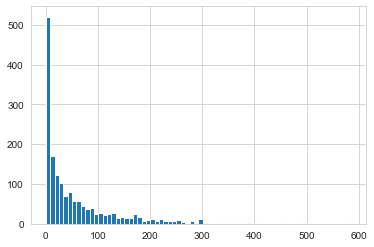

In [59]:
# Most of our number of ratings are actually quite few, most movies have 0 or 1 ratings.
ratings['number_ratings'].hist(bins=70)

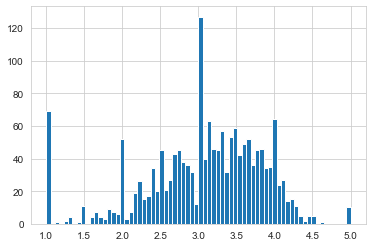

In [60]:
# The 5 star movies could be the popular movies or the movies that have few viewers that rated them as 5.
# Notice that most of the movies are rated around 3.5 stars.
ratings['rating'].hist(bins=70)

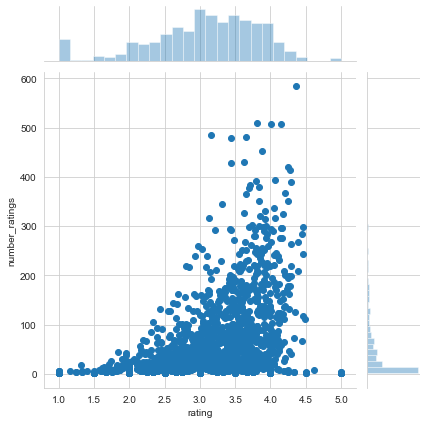

In [61]:
# Notice here most of the popular movies are rated in 3.5 range.
sns.jointplot(x='rating', y='number_ratings', data=ratings)

## Recomender System

Now let's create a matrix that has the user ids on one access and the movie title on another axis. Each cell will then consist of the rating the user gave to that movie. Note there will be a lot of NaN values, because most people have not seen most of the movies.

In [62]:
moviemat = df.pivot_table(index='user_id',columns='title',values='rating')
moviemat.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
ratings.head()

,rating,number_ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485


In [64]:
# we choose star wars and liar liar movies

In [65]:
starwars_user_ratings = moviemat['Star Wars (1977)']
liarliar_user_ratings = moviemat['Liar Liar (1997)']
starwars_user_ratings.head()

user_id
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
Name: Star Wars (1977), dtype: float64

In [66]:
# check the correlation btw 2 data frames with corrwith
similar_to_starwars = moviemat.corrwith(starwars_user_ratings)
similar_to_liarliar = moviemat.corrwith(liarliar_user_ratings)

In [67]:
# create a data frme that is btw each movie and its correlation with star wars movies , we drop the null values cuz 
# maybe some useres did'nt rate that movie
corr_starwars = pd.DataFrame(similar_to_starwars,columns=['Correlation'])
corr_starwars.dropna(inplace=True)
corr_starwars.head()

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


In [68]:
# add the number of ratings also
corr_starwars = corr_starwars.join(ratings['number_ratings'])
corr_starwars.head()

,Correlation,number_ratings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


In [69]:
# nothing much was understood from the data frame above so we consider the movies with number of ratings above 100
# we notice that Empire Strikes back movie is the most similar movie to our chosen movie(star wars)


corr_starwars[corr_starwars['number_ratings']>100].sort_values('Correlation',ascending=False).head()

,Correlation,number_ratings
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130


In [70]:
# We do the same as above for liar liar movie
# we notice that Batman Forever movie is most similar to our liar liar movie

corr_liarliar = pd.DataFrame(similar_to_liarliar,columns=['Correlation'])

corr_liarliar.dropna(inplace=True)

corr_liarliar = corr_liarliar.join(ratings['number_ratings'])

corr_liarliar[corr_liarliar['number_ratings']>100].sort_values('Correlation',ascending=False).head()

,Correlation,number_ratings
title,,
Liar Liar (1997),1.000000,485
Batman Forever (1995),0.516968,114
"Mask, The (1994)",0.484650,129
Down Periscope (1996),0.472681,101
Con Air (1997),0.469828,137
